**TASK 2 - To Explore Supervised Machine Learning**

**Linear Regression**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as cm
import seaborn as sns
sns.set()

data_url = "http://bit.ly/w-data"
li=pd.read_csv(data_url)
print("Data import successful")

Data import successful


In [4]:
li.shape

(25, 2)

**The Data has 25 rows and 2 columns**

a) Hours of Study

b) Scores

In [5]:
li.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Average Hours of Study


In [6]:
li['Hours'].mean()

5.012

Average Score


In [7]:
li['Scores'].mean()

51.48

In [8]:
li.iloc[li['Hours'].idxmax()] #maximum hours of study

Hours      9.2
Scores    88.0
Name: 6, dtype: float64

In [9]:
li.iloc[li['Hours'].idxmin()] #minimum hours of study

Hours      1.1
Scores    17.0
Name: 14, dtype: float64

*Taking 33 out of 100 as general passing marks as scores are ranging from 17 to 95*

Number of students passed

In [10]:
li[li['Scores']>=33].sort_values(by='Scores',ascending=False).style.background_gradient(subset=['Scores'],cmap="Greens")

,Hours,Scores
15,8.900000,95
6,9.200000,88
24,7.800000,86
10,7.700000,85
8,8.300000,81
23,6.900000,76
3,8.500000,75
19,7.400000,69
18,6.100000,67
11,5.900000,62


Number of Students Failed

In [11]:
li[li['Scores']<33].sort_values(by='Scores').style.background_gradient(subset=['Scores'],cmap='OrRd_r')

,Hours,Scores
14,1.100000,17
5,1.500000,20
0,2.500000,21
17,1.900000,24
9,2.700000,25
2,3.200000,27
4,3.500000,30
16,2.500000,30
20,2.700000,30


In [12]:
li2=li.copy()
li2.index=li2['Hours']
li2.drop('Hours',axis=1,inplace=True)

In [19]:
li2.index=li2.index.astype('int')

**HOURS VS SCORES FOR BOTH THE PASSED AND FAILED STUDENTS**

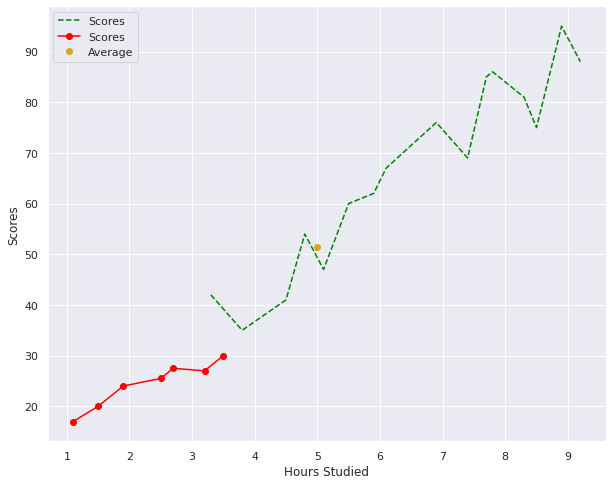

In [13]:
failed=li2.loc[li2.Scores<33]
passed=li2.loc[li2.Scores>=33]
ax=passed.groupby(passed.index).aggregate('mean').plot(style=['--'],color='Green',figsize=(10,8))
failed.groupby(failed.index).aggregate('mean').plot(ax=ax,style=['-o'],color='Red')
plt.plot(5,51.48,'ro',color='goldenrod',label="Average")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
# plt.title("Distribution of Scores")
plt.legend()

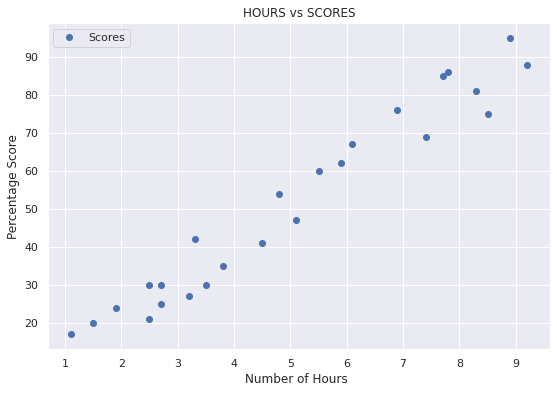

In [15]:
li.plot(x='Hours', y='Scores', style='o',figsize=(9,6))  
plt.title('HOURS vs SCORES')  
plt.xlabel('Number of Hours ')  
plt.ylabel('Percentage Score')  
plt.show()


**TRAINING**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#Dividing the data into data and labels
X=li['Hours'].values[:,np.newaxis]
y=li['Scores'].values[:,np.newaxis]

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("X Train",x_train.shape)
print("X Test",x_test.shape)
print("Y Train",y_train.shape)
print("Y Test",y_test.shape)

X Train (20, 1)
X Test (5, 1)
Y Train (20, 1)
Y Test (5, 1)


In [19]:
import pickle
l=LinearRegression()
l.fit(x_train,y_train)
filename = 'linear1_model.sav'
pickle.dump(l, open(filename, 'wb'))
print("Training Completed")

Training Completed


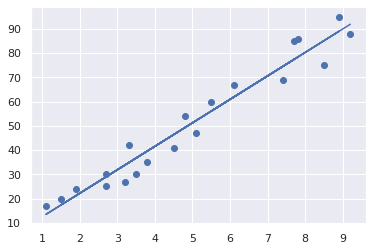

In [20]:
line=l.coef_*x_train+l.intercept_
plt.scatter(x_train,y_train)
plt.plot(x_train,line)

**PREDICTION**

In [24]:
y_pred=l.predict(x_test).reshape(-1)

In [21]:
y_test

array([[81],
       [30],
       [21],
       [76],
       [62]])

In [25]:
li3=pd.DataFrame({
    'Predicted':y_pred,
    'Actual':y_test.reshape(-1)})

li3.index=np.arange(5)
li3

,Predicted,Actual
0,83.188141,81
1,27.032088,30
2,27.032088,21
3,69.633232,76
4,59.951153,62


In [26]:
from sklearn import metrics  
print('Mean Absolute Error:', \
round(metrics.mean_absolute_error(y_test, y_pred)),2)

Mean Absolute Error: 4.0 2


To predict the score for 9.25 hours of study


In [31]:

hours=[9.25,2]
n=np.array([9.25,2])[:,np.newaxis]
p=l.predict(n)
for h in range(len(hours)):
    print("{0:20s} {1}".format("Number of hours-",hours[h]))
    print("{0:20s} {1}".format("Scores -",round(p[h][0],1)))
    print("\n")

Number of hours-     9.25
Scores -             92.4


Number of hours-     2
Scores -             22.2




**EVALUATING**

In [32]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.9207511902099244


**TASK 2 COMPLETED**